<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [ ]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [3]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━━━╸━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [27]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [9]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [10]:
tesla = yf.Ticker("TSLA")
print(tesla.info)

{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [11]:
tesla_data = tesla.history(period="max")
print(tesla_data.head())


                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [21]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Download the webpage
response = requests.get(url)

# Save the text of the response
html_data = response.text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [23]:
from bs4 import BeautifulSoup
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')  # or 'html5lib'

# Now you can work with the parsed HTML content using BeautifulSoup methods
# For example, you can find elements, extract text, etc.

# Print the title of the webpage as an example
print("Title of the webpage:", soup.title.string)

Title of the webpage: Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [30]:
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing Tesla revenue data
table = soup.find('table')

# Convert the HTML table into a pandas DataFrame
tesla_revenue = pd.read_html(str(table))[0]

# Rename columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Display the first few rows of the DataFrame
print(tesla_revenue.head())

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [31]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Execute the following lines to remove an null or empty strings in the Revenue column.


In [32]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [33]:
print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [37]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [39]:
gme_data = gme.history(period="max")

- GME: Request Failed


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [42]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

# Extract historical market data for GameStop with period set to 'max'
gme_data = gme.history(period="max")

# Reset the index of the dataframe
gme_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(gme_data.head())

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [63]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

In [64]:
import requests
from bs4 import BeautifulSoup

# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data_2
html_data_2 = response.text

# Parse the HTML data using BeautifulSoup with the html.parser parser
soup = BeautifulSoup(html_data_2, 'html.parser')
print(soup.title.string)

GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [67]:
import pandas as pd

# URL of the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Read all tables from the webpage
tables = pd.read_html(url)

# Find the table with the GameStop Revenue (usually the table you want is the first one)
gme_revenue = tables[0]

# Rename columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Remove commas and dollar signs from the 'Revenue' column and convert to numeric
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Display the DataFrame
print(gme_revenue)

    Date  Revenue
0   2020   6466.0
1   2019   8285.0
2   2018   8547.0
3   2017   7965.0
4   2016   9364.0
5   2015   9296.0
6   2014   9040.0
7   2013   8887.0
8   2012   9551.0
9   2011   9474.0
10  2010   9078.0
11  2009   8806.0
12  2008   7094.0
13  2007   5319.0
14  2006   3092.0
15  2005   1843.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [68]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
print(gme_revenue.tail())

    Date  Revenue
11  2009   8806.0
12  2008   7094.0
13  2007   5319.0
14  2006   3092.0
15  2005   1843.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [71]:
pip install matplotlib pandas yfinance

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


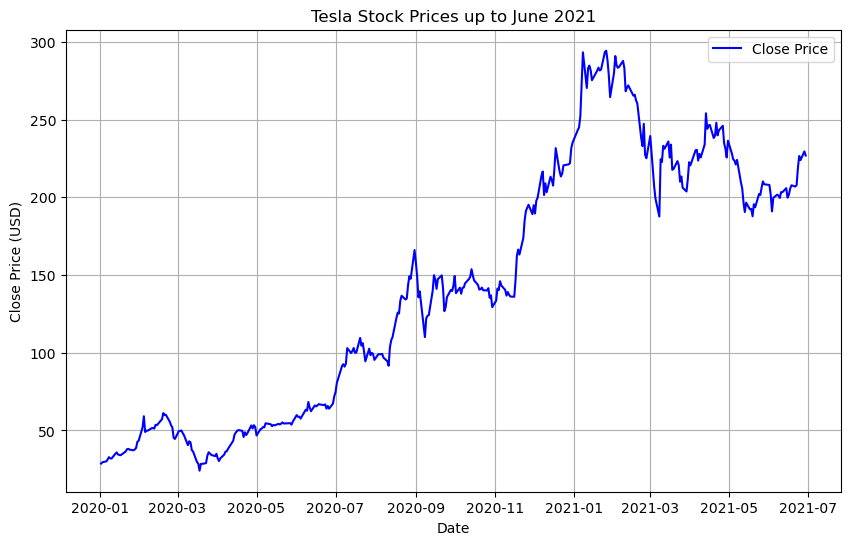

In [72]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the function to create the graph
def make_graph(df, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Fetch Tesla stock data up to June 2021
tesla = yf.download('TSLA', start='2020-01-01', end='2021-06-30')

# Call the make_graph function with the Tesla data and a title
make_graph(tesla, 'Tesla Stock Prices up to June 2021')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


[*********************100%***********************]  1 of 1 completed


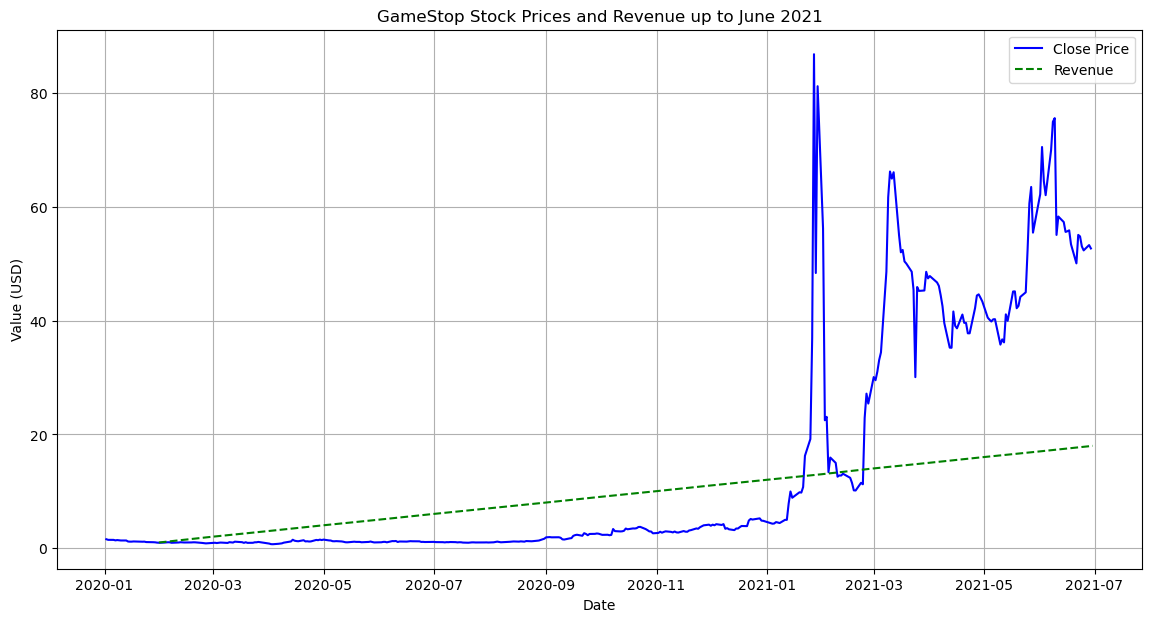

In [74]:
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))
    
    # Plot stock data
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
    
    # Plot revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='green', linestyle='--')
    
    # Labeling
    plt.xlabel('Date')
    plt.ylabel('Value (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Fetch GameStop stock data up to June 2021
gme = yf.download('GME', start='2020-01-01', end='2021-06-30')
# For demonstration purposes, let's create a mock gme_revenue DataFrame
# Replace this with the actual DataFrame you have
gme_revenue = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', end='2021-06-30', freq='M'),
    'Revenue': range(1, 19)  # Mock data, replace with actual revenue data
})

# Ensure the 'Date' column is in datetime format
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Call the make_graph function with the GameStop data and a title
make_graph(gme, gme_revenue, 'GameStop Stock Prices and Revenue up to June 2021')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
